In [18]:
import pandas as pd
import seaborn as sns 
import scipy as sp 
import numpy as np
from  matplotlib import pyplot as plt
sns.set(font_scale=1.5, style="white",  #palette="viridis", 
        rc={'font.size': 16, 'figure.figsize': (15,5), 'axes.grid': True, 'lines.linewidth':2.0, 
            'grid.color': '.8', 'grid.linewidth': 0.5,})

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
ch1 = pd.read_csv("../data/chen_1_rep_50.csv")
ch2 = pd.read_csv("../data/chen_2_rep_50.csv")
ch3 = pd.read_csv("../data/chen_3_rep_50.csv")

In [8]:
df = pd.concat([ch1, ch2, ch3])
df.columns = "scenario", "sample_size", "s_factor", "value_f"

In [25]:
df.loc[df.scenario == "chen3", "scenario"] = "chen4"

In [ ]:
df.to_csv("../data/chen_rep_50.csv")

In [64]:
ooo = df.groupby("scenario").apply(lambda o: o.pivot_table(values="value_f", index="sample_size", columns="s_factor", ))

In [65]:
ooo

s_factor                     50         51         52         53         54  \
scenario sample_size                                                          
chen1    50          -12.970412 -12.968097 -12.964880 -12.962432 -12.958332   
         100           7.223963   7.224585   7.225178   7.225673   7.226597   
         200           7.956153   7.956203   7.956233   7.956237   7.956230   
         400           7.984739   7.984732   7.984731   7.984731   7.984730   
         800           7.985755   7.985752   7.985753   7.985748   7.985745   
chen2    50            0.277775   0.285962   0.295312   0.306906   0.317457   
         100           3.775407   3.784421   3.787552   3.794392   3.801880   
         200           5.235059   5.236330   5.237235   5.237664   5.238489   
         400           5.656658   5.657525   5.658063   5.659078   5.659512   
         800           5.966039   5.966373   5.966735   5.967322   5.967326   
chen4    50           -3.836085  -3.829352  -3.818108  -3.808020  -3.796086   
         100          -1.346666  -1.332131  -1.319974  -1.307407  -1.295242   
         200           1.358436   1.372560   1.387559   1.400643   1.412208   
         400           5.246555   5.249871   5.252133   5.255791   5.258967   
         800           5.888761   5.889906   5.891493   5.893037   5.893841   

s_factor                     55         56         57         58         59  \
scenario sample_size                                                          
chen1    50          -12.955293 -12.954163 -12.952066 -12.948624 -12.946417   
         100           7.227509   7.228286   7.229375   7.229618   7.230043   
         200           7.956301   7.956329   7.956360   7.956450   7.956494   
         400           7.984721   7.984719   7.984716   7.984709   7.984710   
         800           7.985745   7.985740   7.985738   7.985738   7.985737   
chen2    50            0.326742   0.337134   0.347243   0.356819   0.367100   
         100           3.806209   3.812515   3.817539   3.823538   3.829667   
         200           5.239662   5.240109   5.240506   5.241316   5.243062   
         400           5.659758   5.660243   5.660825   5.661885   5.662270   
         800           5.967505   5.967873   5.968122   5.968459   5.968385   
chen4    50           -3.786019  -3.775676  -3.766608  -3.755159  -3.742178   
         100          -1.277484  -1.265291  -1.253886  -1.240276  -1.226758   
         200           1.427738   1.438202   1.451434   1.467335   1.479206   
         400           5.262247   5.264426   5.269267   5.271817   5.275959   
         800           5.895224   5.896111   5.897479   5.898699   5.899663   

s_factor                ...             90         91         92         93  \
scenario sample_size    ...                                                   
chen1    50             ...     -12.853529 -12.851195 -12.846917 -12.841207   
         100            ...       7.244231   7.244625   7.244820   7.244889   
         200            ...       7.957182   7.957122   7.957041   7.957021   
         400            ...       7.984447   7.984445   7.984436   7.984433   
         800            ...       7.985617   7.985612   7.985598   7.985587   
chen2    50             ...       0.616975   0.623804   0.638381   0.648920   
         100            ...       3.931074   3.935047   3.936717   3.938099   
         200            ...       5.259027   5.259450   5.258923   5.258320   
         400            ...       5.675543   5.676280   5.676802   5.677295   
         800            ...       5.972712   5.972957   5.973313   5.973141   
chen4    50             ...      -3.348870  -3.330653  -3.308142  -3.288140   
         100            ...      -0.764141  -0.740313  -0.718680  -0.698439   
         200            ...       1.897468   1.914780   1.933250   1.953561   
         400            ...       5.362272   5.365443   5.369124   5.373215   
         800            ...       5.931046   5.9

In [ ]:
df.groupby("scenario").apply(lambda o: o.plot())

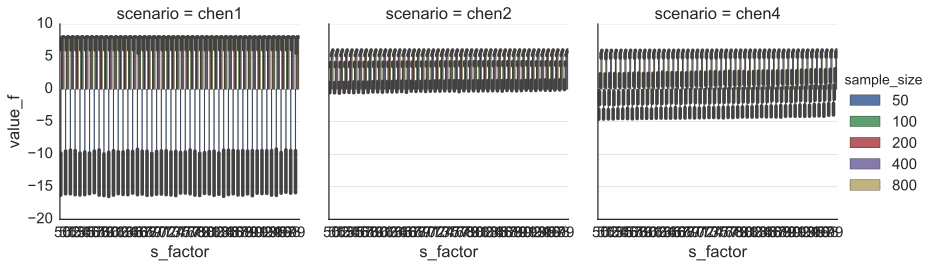

In [ ]:
g = sns.factorplot( x="s_factor", y="value_f",  hue="sample_size", col="scenario", data=df,
                   size=4, kind="bar")

In [ ]:
g = sns.factorplot(x="s_factor", y="value_f", hue="sample_size", col="scenario", data=df,
                   capsize=.2, palette="YlGnBu_d", size=5, aspect=.7)
g.despine(left=True)

In [ ]:
ooo.loc[:, [50, 95]]

In [ ]:
sns.heatmap(ooo, annot=True, fmt="d", linewidths=.5)